<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np


# Read World bank CSV

In [2]:
df = pd.read_csv('WorldBank.csv')

In [12]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072e+00,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050e+00,1.012461e+01,9.451370e+00,1.052948e+01,1.089112e+01,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,1.708001e+01,1.519791e+01,1.686304e+01,2.200813e+01,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261e+00,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002065e+00,1.312934e+00,1.516276e+00,1.695659e+00,2.092116e+00,1.937363e+00,1.506588e+00,1.552336e+00,1.760283e+00,NaN
1436,India,IND,"Net capital account (BoP, current US$)",BN.TRF.KOGT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.791581e+07,-5.972328e+08,9.618297e+08,-7.433364e+07,3.706943e+07,1.368359e+08,3.731153e+07,-1.231007e+08,-1.155591e+09,NaN
1437,India,IND,"Travel services (% of service imports, BoP)",BM.GSR.TRVL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761773e+01,1.544257e+01,1.475397e+01,1.799216e+01,1.795378e+01,1.707263e+01,1.686302e+01,1.716750e+01,1.755462e+01,NaN
1438,India,IND,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,8.737650e+07,8.725755e+07,9.037301e+07,9.370600e+07,7.969950e+07,...,2.878600e+08,2.932900e+08,2.949095e+08,2.960100e+08,2.843330e+08,2.978500e+08,3.136100e+08,NaN,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [3]:
data = df[df['Indicator Name']== 'Population ages 15-64 (% of total population)']
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


# Divide the data into input and output

In [5]:
x = np.arange(1960, 2020).reshape(-1, 1)  
y = data.values[0][4:-1]

# Plot scatter plot of Population ages 15-64 (% of total population)

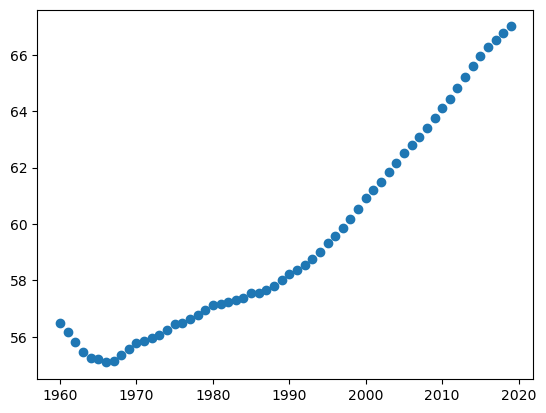

In [6]:
plt.scatter(x, y)

# Splitting the dataset into the Training set and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)


In [34]:
X_test

array([[1960],
       [1965],
       [1996],
       [2005],
       [1973],
       [2014],
       [1993],
       [2008],
       [1972],
       [2017],
       [2006],
       [2010],
       [1991],
       [1963],
       [2012],
       [1977],
       [1968],
       [1966]])

In [10]:
y_test

array([58.37403848, 57.1425581, 67.00381119, 56.62068516, 55.78194745,
       62.173897, 59.012126, 56.44405309, 57.18105454, 58.22990246,
       59.8572303, 62.52276485, 55.95268174, 56.07247186, 57.6545119,
       56.78900152, 58.5472698, 56.17753236], dtype=object)

In [31]:
X_train

array([[1976],
       [1995],
       [2003],
       [1982],
       [2015],
       [2009],
       [1989],
       [2011],
       [2000],
       [1996],
       [2010],
       [1969],
       [1993],
       [1962],
       [2001],
       [1984],
       [1965],
       [2016],
       [1966],
       [1971],
       [1960],
       [1967],
       [2018],
       [1998],
       [2012],
       [2008],
       [1986],
       [2002],
       [2006],
       [2017],
       [1968],
       [2013],
       [1974],
       [1988],
       [1999],
       [1983],
       [1979],
       [1963],
       [2014],
       [1985],
       [1964],
       [2007]])

In [9]:
y_train

array([56.49722595, 59.31657719, 61.83084479, 57.22630775, 65.94416405,
       63.74196691, 58.01501187, 64.429404, 60.90862046, 59.56507329,
       64.10821053, 55.57014408, 58.75605047, 55.80745463, 61.18898716,
       57.39054366, 55.21135053, 66.27426247, 55.09090078, 55.85676846,
       56.49748004, 55.15534672, 66.7667425, 60.18600058, 64.80551944,
       63.40924784, 57.55350984, 61.4993847, 62.80842981, 66.53818711,
       55.34507283, 65.20848906, 56.23447551, 57.81875323, 60.53971518,
       57.28875038, 56.9691436, 55.46166361, 65.5959799, 57.54142108,
       55.24893881, 63.10261029], dtype=object)

# Fitting SVR on 3 Different Kernel on dataset

In [11]:
model_lin = SVR(kernel='linear')

In [12]:
model_poly = SVR(kernel='poly', C=1.0,epsilon=0.1,)

In [13]:
model_rbf = SVR(kernel='rbf')

In [14]:
model_lin.fit(X_train, y_train)

SVR(kernel='linear')

In [17]:
model_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [18]:
model_rbf.fit(X_train, y_train)

SVR()

# Predict the x_test using 3 Kernel

In [19]:
y_predict_lin = model_lin.predict(x)
y_predict_model = model_poly.predict(x)
y_predict_rbf = model_rbf.predict(x)

# Visualising the  results

In [20]:
y_test

array([58.37403848, 57.1425581, 67.00381119, 56.62068516, 55.78194745,
       62.173897, 59.012126, 56.44405309, 57.18105454, 58.22990246,
       59.8572303, 62.52276485, 55.95268174, 56.07247186, 57.6545119,
       56.78900152, 58.5472698, 56.17753236], dtype=object)

In [21]:
y_predict_lin


array([53.50910346, 53.71343665, 53.91776983, 54.12210301, 54.32643619,
       54.53076937, 54.73510255, 54.93943573, 55.14376892, 55.3481021 ,
       55.55243528, 55.75676846, 55.96110164, 56.16543482, 56.36976801,
       56.57410119, 56.77843437, 56.98276755, 57.18710073, 57.39143391,
       57.59576709, 57.80010027, 58.00443346, 58.20876664, 58.41309982,
       58.617433  , 58.82176618, 59.02609936, 59.23043254, 59.43476573,
       59.63909891, 59.84343209, 60.04776527, 60.25209845, 60.45643163,
       60.66076481, 60.865098  , 61.06943118, 61.27376436, 61.47809754,
       61.68243072, 61.8867639 , 62.09109708, 62.29543027, 62.49976345,
       62.70409663, 62.90842981, 63.11276299, 63.31709617, 63.52142935,
       63.72576254, 63.93009572, 64.1344289 , 64.33876208, 64.54309526,
       64.74742844, 64.95176163, 65.1560948 , 65.36042799, 65.56476117])

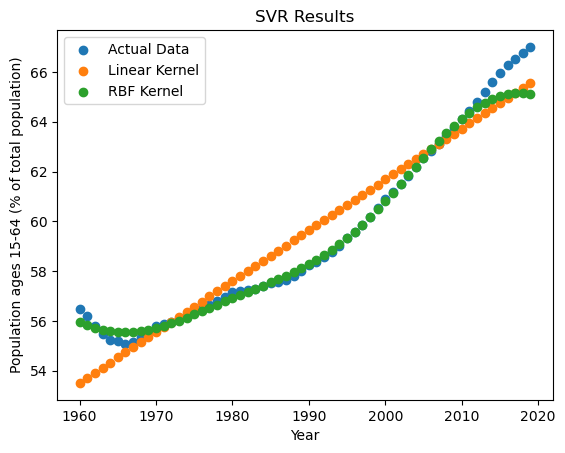

In [22]:
plt.scatter(x, y,label='Actual Data')
plt.scatter(x, y_predict_lin, label='Linear Kernel')
plt.scatter(x, y_predict_rbf, label='RBF Kernel')
plt.title('SVR Results')
plt.xlabel('Year')
plt.ylabel('Population ages 15-64 (% of total population)')
plt.legend()
plt.show()

# Decision Tree Classifier

In [23]:
# Visualising the  resultsfrom sklearn.datasets import load_iris

# Import iris data ser using sklearn

In [24]:
from sklearn.datasets import load_iris

# Importing the libraries

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Divide the data into input and output

In [29]:
data = load_iris()


In [30]:
x=data.data

In [32]:
y=data.target

# Splitting the dataset into the Training set and Test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

# Fitting DecisionTreeClassifier on dataset

In [37]:
model = DecisionTreeClassifier()

In [38]:
t = model.fit(X_train, y_train)

# Display Decision Tree

[Text(0.3181818181818182, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [33, 37, 35]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.4090909090909091, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[2] <= 5.35\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.45454545454545453, 0.4166666666666667, 'x[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8181818181818182, 0.41

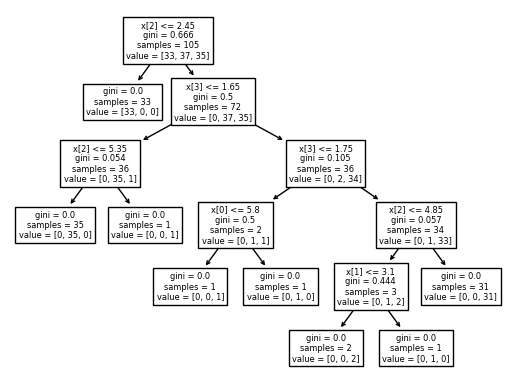

In [39]:
tree.plot_tree(t)

# Predict the x_test 

In [40]:
y_predict = model.predict(X_test)

In [41]:
accuracy_score(y_test, y_predict)

0.9555555555555556